In [323]:
# Jaime Gonzalez Koninckx & Mariano Lorenzo Kayser


# All of the code has been implemented in Google Colab, as we were unable to run it locally in VS Code.
# Here is the url: https://colab.research.google.com/
# You should open our notebook and then load the data, with both there is everything ready to run.

# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Load datasets(In order to open them, make sure all of them are not saved in a folder, or change the path with ./)
client_df = pd.read_csv("client_info.csv")
purchase_df = pd.read_csv("purchase_info.csv")
city_df = pd.read_csv("city_info.csv")

# Verify that the datasets were loaded correctly
print("Clients:")
display(client_df.head())

print("Purchases:")
display(purchase_df.head())

print("Cities:")
display(city_df.head())

# Dataset sizes
print(f"Clients: {client_df.shape}")
print(f"Purchases: {purchase_df.shape}")
print(f"Cities: {city_df.shape}")


Clients:


,user_id,client_location,activity,marital,tenure,gender,customer_satisfaction_score,customer_satisfaction_score_red,spending_to_lifetime,num_accounts,OBS_DATE,churn
0,55a0e46e-4337-42e8-b296-69c3e28b96b9,Dusseldorf,Standard,Single,41.0,M,12192.478225821713,4.876991290328685,0.0192360205972127,1.0,2018-02-05 00:00:00,0.0
1,4cd55fe0-01b2-4131-8190-29f19737025e,Essen,Frequent,Living together,137.0,M,10304.343727797594,4.121737491119037,0.0026597704347352,NaN,2014-12-03 00:00:00,0.0
2,072f9a99-abf3-410d-9b33-6d8e1a98aa55,Munich,Frequent,Single,111.0,F,10059.186443313049,4.023674577325219,NaN,1.0,2014-06-04 00:00:00,0.0
3,c5121ccc-0b6b-4117-92d5-4c696f4f4792,Hamburg,Standard,Single,51.0,F,8700.661269890412,3.4802645079561647,0.0135529669929113,NaN,2013-10-11 00:00:00,1.0
4,c40fd158-803c-404a-af79-b16a9f4ac13d,Munich,Frequent,Divorced,139.0,F,6713.225034804518,2.6852900139218074,0.0059846886709199,NaN,Not avail.,0.0


Purchases:


,user_id,account_id,total_spending,average_order_value
0,fd7ae119-6df8-443b-8477-87245a8eb057,2,1503.9202254884333,131.0
1,99288779-78e9-42a2-9484-70fb8a6b8774,1,17827.780163521827,256.0
2,e4e8b5e9-7a53-4be2-a240-b139cd352f62,2,669.2877628796366,103.0
3,197defa3-c543-499c-9b38-5f025c92a79c,1,7465.126127020759,191.0
4,2109dda6-9805-429b-8812-5933072c18cd,1,12696.943789066492,208.0


Cities:


,City,Berlin,Hamburg,Munich,Cologne,Frankfurt am Main,Stuttgart,Dusseldorf,Dortmund,Essen,Leipzig
0,Population,3769495,1852478,1558395,1080394,763380,634830,619294,612178,582624,605407
1,GDP per Capita (EUR),42000,50000,62000,42000,70000,55000,55000,40000,38000,35000


Clients: (10128, 12)
Purchases: (12393, 4)
Cities: (2, 11)


In [324]:
# CLEANING client_df

# Convert OBS_DATE to datetime format, solving errors or blank spaces
client_df['OBS_DATE'] = pd.to_datetime(client_df['OBS_DATE'], errors='coerce')

# Convert num_accounts to integer, filling NaNs with 1 as a minimum value as everyone has almost 1 account
client_df['num_accounts'] = pd.to_numeric(client_df['num_accounts'], errors='coerce').fillna(1).astype(int)

# Convert churn to numeric, solving errors or blank spaces
client_df['churn'] = pd.to_numeric(client_df['churn'], errors='coerce')

# Convert customer_satisfaction_score to numeric, solving errors or blank spaces
client_df['customer_satisfaction_score'] = pd.to_numeric(client_df['customer_satisfaction_score'], errors='coerce')
client_df['customer_satisfaction_score_red'] = pd.to_numeric(client_df['customer_satisfaction_score_red'], errors='coerce')

# Ensure no missing values in satisfaction columns, we used the mean of all data if there were not value, in order to be more precise
client_df['customer_satisfaction_score'] = client_df['customer_satisfaction_score'].fillna(client_df['customer_satisfaction_score'].mean())
client_df['customer_satisfaction_score_red'] = client_df['customer_satisfaction_score_red'].fillna(client_df['customer_satisfaction_score_red'].mean())

# Some rows contain numbers instead of valid categories (like 'frequent' or 'standard'), so we replace them with NaN
client_df['activity'] = client_df['activity'].replace(['1', '2', '3'], np.nan)

# Convert tenure and spending_to_lifetime to numeric, solving errors or blank spaces
client_df['tenure'] = pd.to_numeric(client_df['tenure'], errors='coerce')
client_df['spending_to_lifetime'] = pd.to_numeric(client_df['spending_to_lifetime'], errors='coerce')

# Normalize text in categorical variables
client_df['activity'] = client_df['activity'].str.lower().str.strip()
client_df['marital'] = client_df['marital'].str.lower().str.strip()
client_df['gender'] = client_df['gender'].str.lower().str.strip()

# Drop duplicate entries in client_df based on 'user_id', after verifying that duplicates have the same data
client_df = client_df.drop_duplicates(subset=['user_id'], keep='first')

# Clean-up verification
display(client_df.head())
print("Clients:", client_df.shape)


,user_id,client_location,activity,marital,tenure,gender,customer_satisfaction_score,customer_satisfaction_score_red,spending_to_lifetime,num_accounts,OBS_DATE,churn
0,55a0e46e-4337-42e8-b296-69c3e28b96b9,Dusseldorf,standard,single,41.0,m,12192.478226,4.876991,0.019236,1,2018-02-05,0.0
1,4cd55fe0-01b2-4131-8190-29f19737025e,Essen,frequent,living together,137.0,m,10304.343728,4.121737,0.002660,1,2014-12-03,0.0
2,072f9a99-abf3-410d-9b33-6d8e1a98aa55,Munich,frequent,single,111.0,f,10059.186443,4.023675,NaN,1,2014-06-04,0.0
3,c5121ccc-0b6b-4117-92d5-4c696f4f4792,Hamburg,standard,single,51.0,f,8700.661270,3.480265,0.013553,1,2013-10-11,1.0
4,c40fd158-803c-404a-af79-b16a9f4ac13d,Munich,frequent,divorced,139.0,f,6713.225035,2.685290,0.005985,1,NaT,0.0


Clients: (10000, 12)


In [325]:
# CLEANING purchase_df

# Convert numeric columns that may be stored as strings with commas
purchase_df['total_spending'] = purchase_df['total_spending'].astype(str).str.replace(",", ".")
purchase_df['average_order_value'] = purchase_df['average_order_value'].astype(str).str.replace(",", ".")

# Convert to float
purchase_df['total_spending'] = pd.to_numeric(purchase_df['total_spending'], errors='coerce')
purchase_df['average_order_value'] = pd.to_numeric(purchase_df['average_order_value'], errors='coerce')

# Remove negative values
purchase_df = purchase_df[(purchase_df['total_spending'] >= 0) & (purchase_df['average_order_value'] >= 0)]

# Ensure that the 'user_id' column and other relevant fields have the correct data type
purchase_df['user_id'] = purchase_df['user_id'].astype(str)

# Check for remaining missing values in key columns
missing_data = purchase_df.isnull().sum()

# Clean-up verification
display(purchase_df.head())
print("Purchases:", purchase_df.shape)

<ipython-input-325-a4b581ad9468>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchase_df['user_id'] = purchase_df['user_id'].astype(str)


,user_id,account_id,total_spending,average_order_value
0,fd7ae119-6df8-443b-8477-87245a8eb057,2,1503.920225,131.0
1,99288779-78e9-42a2-9484-70fb8a6b8774,1,17827.780164,256.0
2,e4e8b5e9-7a53-4be2-a240-b139cd352f62,2,669.287763,103.0
3,197defa3-c543-499c-9b38-5f025c92a79c,1,7465.126127,191.0
4,2109dda6-9805-429b-8812-5933072c18cd,1,12696.943789,208.0


Purchases: (10883, 4)


In [326]:
# CLEANING city_df

# Load the city dataset
city_df = pd.read_csv("city_info.csv", index_col=0)

# Check that the original columns do not have unexpected names
print("Original columns:", city_df.columns)

# Transpose the table so that each city becomes a row
city_df = city_df.T.reset_index()

# Rename columns correctly
city_df.columns = ['City', 'Population', 'GDP_per_Capita']

# Ensure the data is numeric
city_df['Population'] = pd.to_numeric(city_df['Population'], errors='coerce')
city_df['GDP_per_Capita'] = pd.to_numeric(city_df['GDP_per_Capita'], errors='coerce')

# Check for duplicate city entries
city_df.drop_duplicates(subset=['City'], keep='first', inplace=True)

# Ensure there are no negative values in relevant columns
city_df = city_df[city_df['Population'] >= 0]
city_df = city_df[city_df['GDP_per_Capita'] >= 0]

# Remove possible extra spaces or special characters in city names
city_df['City'] = city_df['City'].str.strip()

# Drop rows with missing values in 'City', 'Population', or 'GDP_per_Capita'
city_df_clean = city_df.dropna(subset=['City', 'Population', 'GDP_per_Capita'])

# Final verification
print("Cleaned city data:")
display(city_df_clean.head())

# Show final dimensions
print("Cleaned city_df shape:", city_df_clean.shape)

Original columns: Index(['Berlin', 'Hamburg', 'Munich', 'Cologne', 'Frankfurt am Main',
       'Stuttgart', 'Dusseldorf', 'Dortmund', 'Essen', 'Leipzig'],
      dtype='object')
Cleaned city data:


,City,Population,GDP_per_Capita
0,Berlin,3769495,42000
1,Hamburg,1852478,50000
2,Munich,1558395,62000
3,Cologne,1080394,42000
4,Frankfurt am Main,763380,70000


Cleaned city_df shape: (10, 3)


In [327]:
# FEATURE ENGINEERING
# We created several new features by combining info from the three datasets
# (clients, purchases, and cities) to see if we could get a more efficient and powerful model.
# The goal was to add more meaningful and interpretable variables
# that could help the model find patterns that aren't obvious in the raw data.

# Total spending per client (aggregated across accounts)
# We sum total spending per user from the purchase dataset.
total_spending_per_client = purchase_df.groupby('user_id')['total_spending'].sum().reset_index()

# Average spending per account
# We merge total spending into the client dataset and calculate the average spending per account.
client_df['total_spending'] = client_df['user_id'].map(
    total_spending_per_client.set_index('user_id')['total_spending']
)
client_df['average_spending_per_account'] = client_df['total_spending'] / client_df['num_accounts']

# GDP per capita associated with each client based on their location
# We keep only relevant columns from the city dataset and map GDP to each user.
city_df_clean = city_df_clean[['City', 'GDP_per_Capita']]
client_df['GDP_per_Capita'] = client_df['client_location'].map(
    city_df_clean.set_index('City')['GDP_per_Capita']
)

# Average order value per client (based on all their purchases)
avg_order_value_per_client = purchase_df.groupby('user_id')['average_order_value'].mean().reset_index()
client_df['average_order_value'] = client_df['user_id'].map(
    avg_order_value_per_client.set_index('user_id')['average_order_value']
)

# Ratio between average order value and spending_to_lifetime
client_df['order_to_lifetime'] = client_df['average_order_value'] / (client_df['spending_to_lifetime'] + 1e-5)

# Customers with low satisfaction but high spending (interaction feature)
# This feature flags users with below-median satisfaction and above-median total spending.
client_df['low_sat_high_spend'] = (
    (client_df['customer_satisfaction_score_red'] < client_df['customer_satisfaction_score_red'].median()) &
    (client_df['total_spending'] > client_df['total_spending'].median())
).astype(int)

# Clients with many accounts but low order value (potential inefficiency)
client_df['inefficient_spender'] = (
    (client_df['average_order_value'] < client_df['average_order_value'].median()) &
    (client_df['num_accounts'] > client_df['num_accounts'].median())
).astype(int)

# Spending per day of account tenure
# Indicates how fast a client is spending relative to the time they’ve been registered.
client_df['spending_per_day'] = client_df['total_spending'] / (client_df['tenure'] + 1e-5)

# Spending relative to the GDP per capita of their city
client_df['spending_vs_gdp'] = client_df['total_spending'] / (client_df['GDP_per_Capita'] + 1e-5)

# Binary indicator for above-average total spenders
avg_total_spending = client_df['total_spending'].mean()
client_df['above_avg_spender'] = (client_df['total_spending'] > avg_total_spending).astype(int)

# Binary indicator for whether the client lives in a top 3 GDP city
top_gdp_cities = city_df_clean.sort_values(by='GDP_per_Capita', ascending=False).head(3)['City'].tolist()
client_df['in_top_gdp_city'] = client_df['client_location'].isin(top_gdp_cities).astype(int)

# Low satisfaction + top GDP city combination
client_df['low_sat_top_city'] = (
    (client_df['in_top_gdp_city'] == 1) &
    (client_df['customer_satisfaction_score_red'] < client_df['customer_satisfaction_score_red'].median())
).astype(int)

# One-hot encoding for categorical variables
client_df = pd.get_dummies(client_df, columns=['activity', 'marital', 'gender'], drop_first=True)

# Spending ratio: Total spending divided by the spending-to-lifetime ratio
client_df['spending_ratio'] = client_df['total_spending'] / (client_df['spending_to_lifetime'] + 1e-5)

# Display a preview of the final dataset
display(client_df.head())


,user_id,client_location,tenure,customer_satisfaction_score,customer_satisfaction_score_red,spending_to_lifetime,num_accounts,OBS_DATE,churn,total_spending,average_spending_per_account,GDP_per_Capita,average_order_value,order_to_lifetime,low_sat_high_spend,inefficient_spender,spending_per_day,spending_vs_gdp,above_avg_spender,in_top_gdp_city,low_sat_top_city,activity_not avail.,activity_occasional,activity_standard,marital_living together,marital_married,marital_not avail.,marital_separated,marital_single,gender_m,spending_ratio
0,55a0e46e-4337-42e8-b296-69c3e28b96b9,Dusseldorf,41.0,12192.478226,4.876991,0.019236,1,2018-02-05,0.0,22189.062760,22189.062760,55000.0,175.0,9092.788772,0,0,541.196521,0.403438,0,0,0,False,False,True,False,False,False,False,True,True,1.152917e+06
1,4cd55fe0-01b2-4131-8190-29f19737025e,Essen,137.0,10304.343728,4.121737,0.002660,1,2014-12-03,0.0,NaN,NaN,38000.0,NaN,NaN,0,0,NaN,NaN,0,0,0,False,False,False,True,False,False,False,False,True,NaN
2,072f9a99-abf3-410d-9b33-6d8e1a98aa55,Munich,111.0,10059.186443,4.023675,NaN,1,2014-06-04,0.0,47076.247972,47076.247972,62000.0,322.0,NaN,0,0,424.110304,0.759294,1,1,0,False,False,False,False,False,False,False,True,False,NaN
3,c5121ccc-0b6b-4117-92d5-4c696f4f4792,Hamburg,51.0,8700.661270,3.480265,0.013553,1,2013-10-11,1.0,NaN,NaN,50000.0,NaN,NaN,0,0,NaN,NaN,0,0,0,False,False,True,False,False,False,False,True,False,NaN
4,c40fd158-803c-404a-af79-b16a9f4ac13d,Munich,139.0,6713.225035,2.685290,0.005985,1,NaT,0.0,NaN,NaN,62000.0,NaN,NaN,0,0,NaN,NaN,0,1,1,False,False,False,False,False,False,False,False,False,NaN


In [328]:
# We make sure to remove columns that cannot be used as predictors
# For example: dates, or IDs that do not provide direct value
# We evaluated all the possible features we calculated below by analyzing their correlation matrix,
# their importance according to different models (such as Lasso, Logistic Regression, and SHAP for XGBoost),
# and the final performance results of each model.
# After this analysis, we decided to remove some features and keep only those
# that consistently provided the best results across all evaluation criteria.

columnas_a_eliminar = ['user_id', 'OBS_DATE', 'client_location','customer_satisfaction_score','average_spending_per_account',
                       'order_to_lifetime','spending_per_day','low_sat_high_spend','low_sat_top_city','above_avg_spender','spending_ratio']
X = client_df.drop(columns=columnas_a_eliminar + ['churn'])
y = client_df['churn']

# Check data types
print("Columnas finales para X:")
print(X.dtypes.value_counts())

Columnas finales para X:
bool       9
float64    7
int64      3
Name: count, dtype: int64


In [329]:
# Convert all values to numeric (in case any string like 'Not avail.' remains)
X = X.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaNs
# We initially tried filling the missing values (NaNs) with the column mean,
# but the results were consistently worse in terms of model performance.
# Therefore, we decided to keep only the rows with complete data and drop the rest.

X = X.dropna()
y = y.loc[X.index]

# Verification
print(f"Clean X: {X.shape}, y:{y.shape}")

Clean X: (7174, 19), y:(7174,)


In [330]:
# Retrieve OBS_DATE from the original DataFrame and align indexes
fechas = client_df.loc[X.index, 'OBS_DATE']

# Define boolean masks for train and out-of-time (OOT) sets
oot_mask = (fechas.dt.year >= 2016) & (fechas.dt.year <= 2018)
X_train = X[~oot_mask]
X_oot = X[oot_mask]
y_train = y[~oot_mask]
y_oot = y[oot_mask]

# Check dataset sizes
print(f"Train: {X_train.shape}, OOT: {X_oot.shape}")

Train: (5275, 19), OOT: (1899, 19)


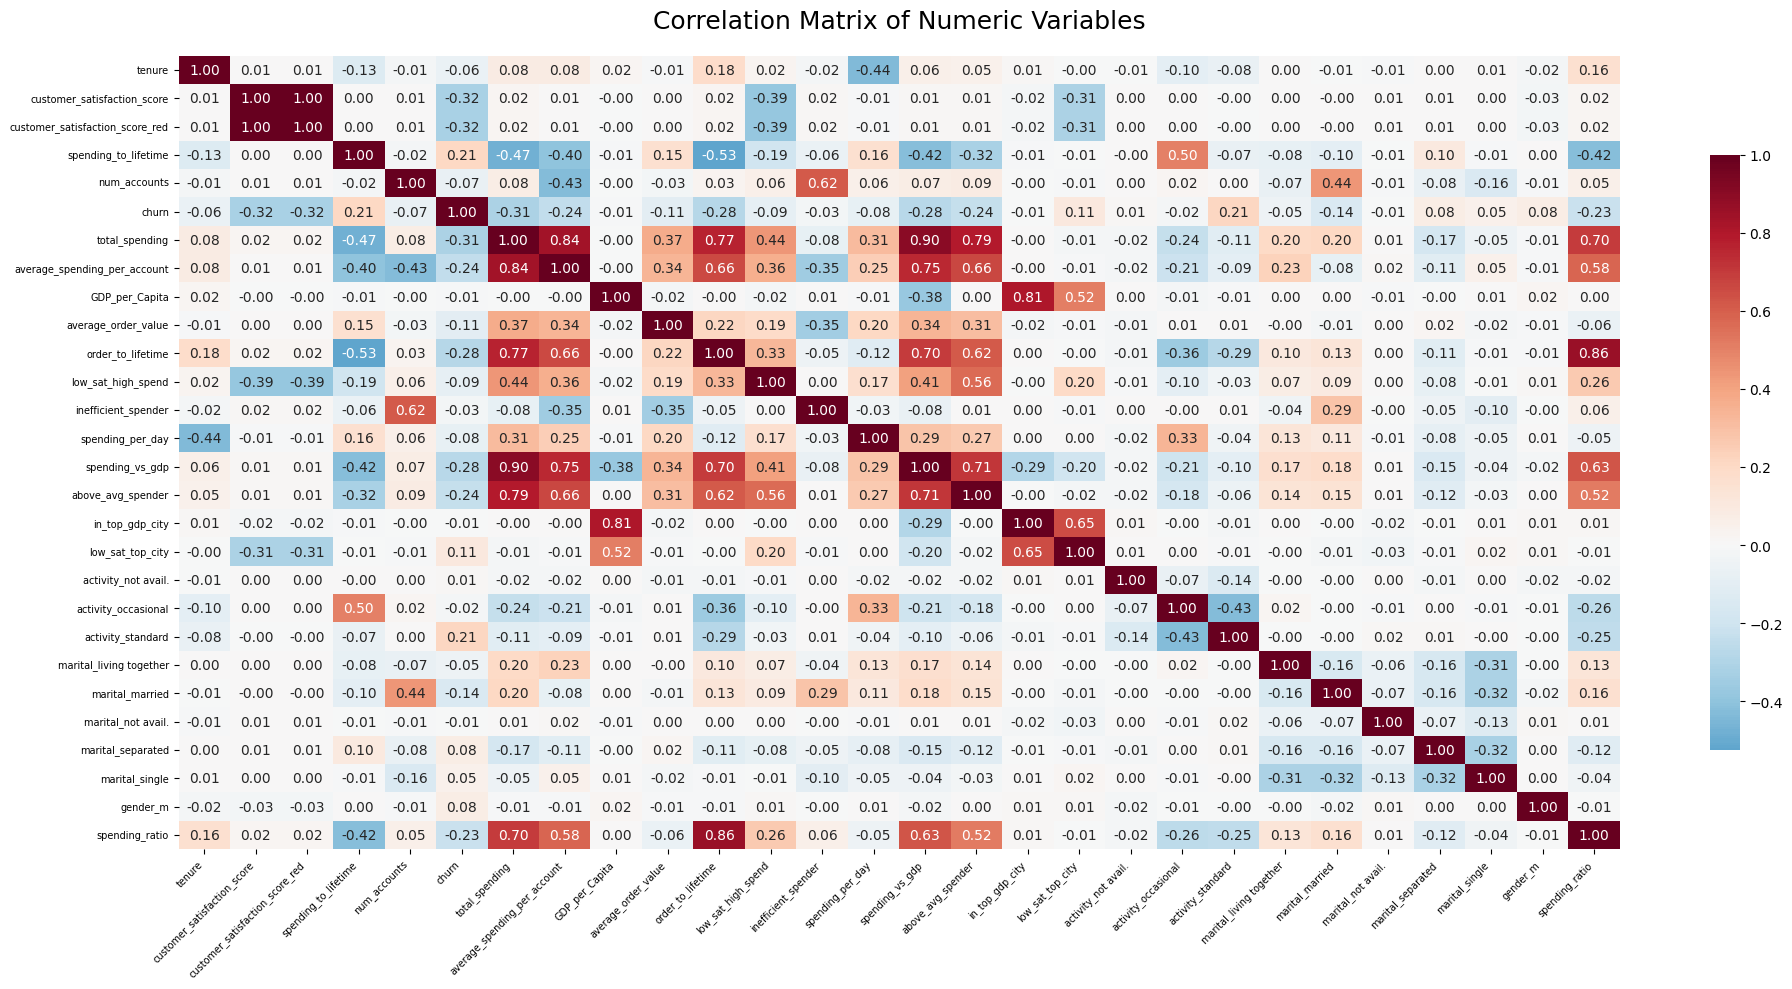

In [331]:
# Copy of the main dataframe
df_corr = client_df.copy()

# Convert boolean columns explicitly to integers
bool_cols = client_df.select_dtypes(include='bool').columns
df_corr[bool_cols] = df_corr[bool_cols].astype(int)

# Select only numeric columns
numeric_cols = df_corr.select_dtypes(include=['number'])

# Compute the correlation matrix to explore how numerical features are related to each other,
# detect multicollinearity, and identify variables that might be strong predictors of churn.

corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='RdBu_r',
    center=0,
    annot_kws={"size": 10},
    cbar_kws={"shrink": 0.75}
)
plt.title("Correlation Matrix of Numeric Variables", fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=7)
plt.yticks(rotation=0, fontsize=7)
plt.tight_layout()
plt.show()



In [332]:
# We applied SMOTE to balance the churn classes,
# as the dataset had far fewer churned customers than non-churned ones.
# This helps the model learn from both classes equally and avoid bias.

from imblearn.over_sampling import SMOTE

# Remove missing values in y_train and align X_train accordingly
X_train = X_train[y_train.notna()]
y_train = y_train[y_train.notna()]

# Apply SMOTE only to the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the class distribution before and after SMOTE
print("Original distribution in y_train:")
print(y_train.value_counts())
print("\n Distribution after SMOTE:")
print(y_train_res.value_counts())

Original distribution in y_train:
churn
0.0    4205
1.0     773
Name: count, dtype: int64

 Distribution after SMOTE:
churn
1.0    4205
0.0    4205
Name: count, dtype: int64


In [333]:
# SCENARIO 1: Logistic Regression (Standard)


# We train the logistic regression model using the balanced training set.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Remove rows with NaN in y_oot and synchronize X_oot accordingly
mask_valid = y_oot.notna()
X_oot_valid = X_oot[mask_valid]
y_oot_valid = y_oot[mask_valid]

# Train logistic regression model
logreg = LogisticRegression(solver='liblinear',max_iter=10000)
logreg.fit(X_train_res, y_train_res)
print(" Logistic regression model trained")

 Logistic regression model trained


In [334]:
# We check which features had the biggest impact on the model by looking at their coefficients.
# This helps us understand which variables are most relevant for predicting churn.

# Variable importance analysis
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': logreg.coef_[0]
})
coef_df['abs_coef'] = coef_df['Coefficient'].abs()
coef_df_sorted = coef_df.sort_values(by='abs_coef', ascending=False).drop(columns='abs_coef')

print("\nMost influential factors in churn:")
display(coef_df_sorted.head(25).reset_index(drop=True))


Most influential factors in churn:


,Feature,Coefficient
0,activity_standard,2.838870
1,customer_satisfaction_score_red,-1.854695
2,marital_single,1.691146
3,marital_separated,1.687704
4,marital_living together,1.465957
5,in_top_gdp_city,-1.300900
6,activity_occasional,1.283537
7,gender_m,1.124898
8,inefficient_spender,-0.715339
9,activity_not avail.,0.581042



 ROC AUC: 0.8868117423689206
 Confusion Matrix:
 [[1308  195]
 [  90  197]]

 Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.87      0.90      1503
         1.0       0.50      0.69      0.58       287

    accuracy                           0.84      1790
   macro avg       0.72      0.78      0.74      1790
weighted avg       0.87      0.84      0.85      1790



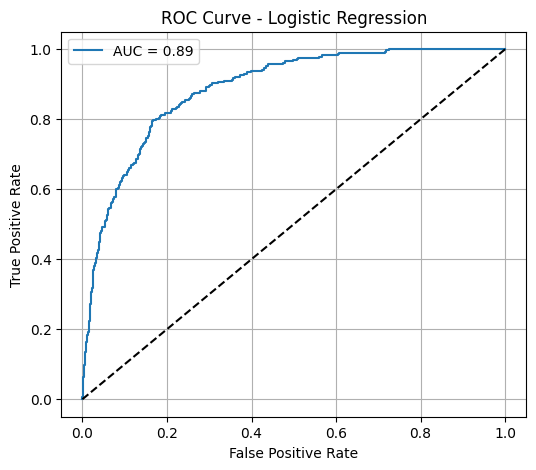

In [335]:
# Evaluate the model's performance on unseen data from 2016–2018 (OOT set).
# This shows how well the model generalizes to future cases of churn.

# Evaluation on OOT set
y_pred = logreg.predict(X_oot_valid)
y_proba = logreg.predict_proba(X_oot_valid)[:, 1]

print("\n ROC AUC:", roc_auc_score(y_oot_valid, y_proba))
print(" Confusion Matrix:\n", confusion_matrix(y_oot_valid, y_pred))
print("\n Classification Report:\n", classification_report(y_oot_valid, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_oot_valid, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_oot_valid, y_proba):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend()
plt.grid()
plt.show()

In [336]:
# SCENARIO 2. Logistic Regression with L1 Regularization (Lasso)

# We now train a new logistic regression model using L1 regularization (Lasso).
# Lasso automatically shrinks less important feature coefficients to zero, helping with variable selection and model simplicity.

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

print("\n Training model with L1 regularization (Lasso) for feature selection...")

# Pipeline to scale features and apply L1-regularized logistic regression
pipeline_l1 = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(penalty='l1', solver='liblinear', max_iter=5000))
])

# Train with the same cleaned and resampled training data
pipeline_l1.fit(X_train_res, y_train_res)

# Extract non-zero coefficients (selected features)
coefs_l1 = pipeline_l1.named_steps['logreg'].coef_[0]
features_l1 = X_train.columns

df_l1 = pd.DataFrame({
    'Feature': features_l1,
    'Coefficient': coefs_l1
})
df_l1 = df_l1[df_l1['Coefficient'] != 0].sort_values(by='Coefficient', key=abs, ascending=False)

print("\n  Features automatically selected by Lasso:")
display(df_l1)



 Training model with L1 regularization (Lasso) for feature selection...

  Features automatically selected by Lasso:


,Feature,Coefficient
1,customer_satisfaction_score_red,-2.334469
12,activity_standard,1.651789
4,total_spending,-1.513329
17,marital_single,0.969233
16,marital_separated,0.784565
13,marital_living together,0.676443
18,gender_m,0.538351
11,activity_occasional,0.485467
10,activity_not avail.,0.400585
2,spending_to_lifetime,0.297513



 ROC AUC (L1): 0.9045532628123544
 Confusion Matrix (L1):
 [[1326  177]
 [  76  211]]

 Classification Report (L1):
               precision    recall  f1-score   support

         0.0       0.95      0.88      0.91      1503
         1.0       0.54      0.74      0.63       287

    accuracy                           0.86      1790
   macro avg       0.74      0.81      0.77      1790
weighted avg       0.88      0.86      0.87      1790



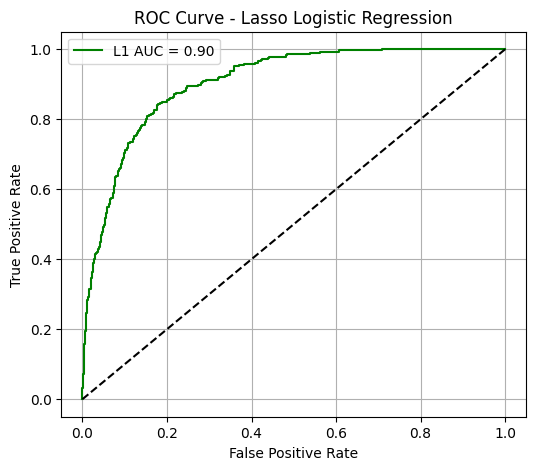

In [337]:
# Evaluate how the Lasso-based model performs on the OOT

y_pred_l1 = pipeline_l1.predict(X_oot_valid)
y_proba_l1 = pipeline_l1.predict_proba(X_oot_valid)[:, 1]

print("\n ROC AUC (L1):", roc_auc_score(y_oot_valid, y_proba_l1))
print(" Confusion Matrix (L1):\n", confusion_matrix(y_oot_valid, y_pred_l1))
print("\n Classification Report (L1):\n", classification_report(y_oot_valid, y_pred_l1))

# ROC Curve for L1 model
fpr_l1, tpr_l1, _ = roc_curve(y_oot_valid, y_proba_l1)
plt.figure(figsize=(6, 5))
plt.plot(fpr_l1, tpr_l1, label=f'L1 AUC = {roc_auc_score(y_oot_valid, y_proba_l1):.2f}', color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Lasso Logistic Regression')
plt.legend()
plt.grid()
plt.show()

In [338]:
# SCENARIO 3. XGBoost Classifier

# Train an XGBoost classifier using the balanced training data (after SMOTE).

from xgboost import XGBClassifier

# Define the XGBoost classifier with tuned hyperparameters
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    scale_pos_weight=1,
    learning_rate=0.1,
    eval_metric='logloss',
    random_state=42
)

# Train the model on the balanced training data
xgb_model.fit(X_train_res, y_train_res)

print(" XGBoost model trained with balanced data")

 XGBoost model trained with balanced data


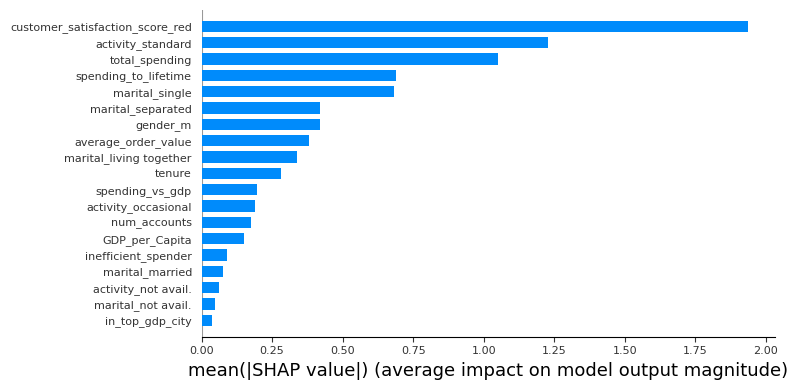

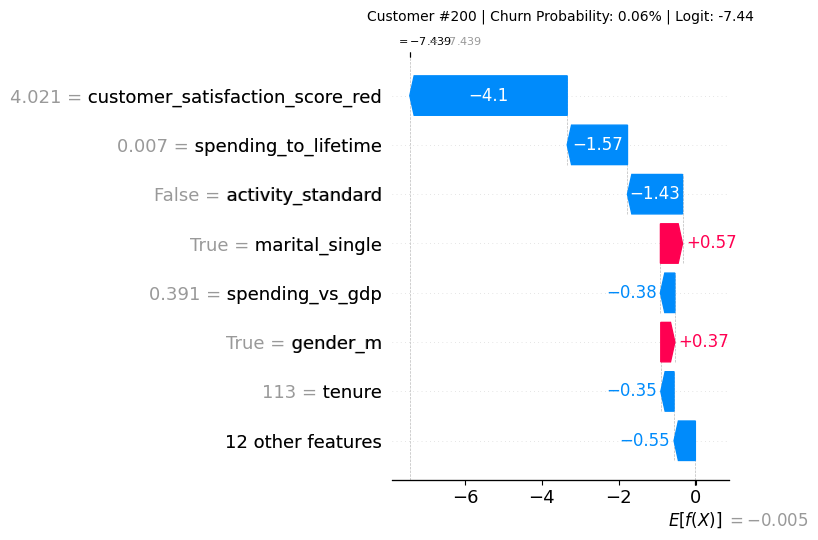

In [339]:
# We use SHAP (SHapley Additive exPlanations) to interpret the predictions of the XGBoost model.
# SHAP values explain how much each feature contributes to the model's prediction for each customer,
# both globally (overall feature importance) and locally (individual customer prediction).


from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import shap
from scipy.special import expit

# Remove rows with NaN in y_oot and align X_oot accordingly
mask_valid = y_oot.notna()
X_oot_valid = X_oot[mask_valid]
y_oot_valid = y_oot[mask_valid]

# Create SHAP explainer for tree-based models (like XGBoost)
explainer = shap.Explainer(xgb_model)

# Compute SHAP values
shap_values = explainer(X_oot_valid[:5000])

# Analyze a specific customer by index
i = 200  # index of the customer to analyze

# Base value (bias) and sum of SHAP contributions
base_value = shap_values.base_values[i]
shap_sum = shap_values[i].values.sum()
logit = base_value + shap_sum
prob = expit(logit)

# SHAP summary plot (global feature importance)
shap.summary_plot(shap_values, X_oot_valid[:5000], plot_type="bar", show=False, plot_size=(8,4))
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Mostrar gráfico SHAP sin título automático
shap.plots.waterfall(shap_values[i], max_display=8, show=False)
plt.title(f"Customer #{i} | Churn Probability: {prob:.2%} | Logit: {logit:.2f}", fontsize=10, pad=10)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()



In [340]:
# Evaluate the XGBoost model on unseen OOT data.
# We predict churn probabilities and adjust the threshold to find the optimal balance of accuracy, precision, and recall.

# Make churn predictions and calculate probabilities
y_pred = xgb_model.predict(X_oot_valid)
y_proba = xgb_model.predict_proba(X_oot_valid)[:, 1]

# Set a custom threshold for deciding churn
threshold = 0.45
y_pred_threshold = (y_proba >= threshold).astype(int)

# Calculate and display evaluation metrics
print("\n ROC AUC:", roc_auc_score(y_oot_valid, y_proba))
print(" Confusion Matrix:\n", confusion_matrix(y_oot_valid, y_pred_threshold))
print("\n Classification Report:\n", classification_report(y_oot_valid, y_pred_threshold))



 ROC AUC: 0.9092824803354962
 Confusion Matrix:
 [[1328  175]
 [  69  218]]

 Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.88      0.92      1503
         1.0       0.55      0.76      0.64       287

    accuracy                           0.86      1790
   macro avg       0.75      0.82      0.78      1790
weighted avg       0.89      0.86      0.87      1790



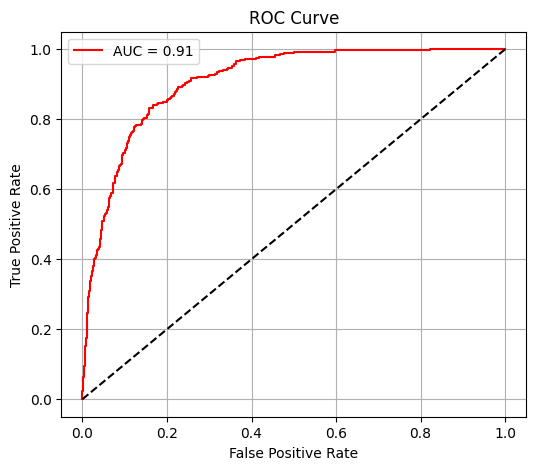

In [341]:
# Ensure no NaNs in y_oot and use the valid version
fpr, tpr, _ = roc_curve(y_oot_valid, y_proba)

# Plot the ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_oot_valid, y_proba):.2f}', color='red')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference (random model)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [342]:
# Comparison of the three scenarios

# Logistic Regression standard
y_proba_logreg = logreg.predict_proba(X_oot_valid)[:, 1]
y_pred_logreg = (y_proba_logreg >= 0.5).astype(int)

# Logistic Regression L1
y_proba_lasso = pipeline_l1.predict_proba(X_oot_valid)[:, 1]
y_pred_lasso = (y_proba_lasso >= 0.5).astype(int)

# XGBoost (custom threshold 0.45)
threshold_xgb = 0.45
y_proba_xgb = xgb_model.predict_proba(X_oot_valid)[:, 1]
y_pred_xgb = (y_proba_xgb >= threshold_xgb).astype(int)

# Metrics calculation for class "1" (churn)
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Logistic Regression (L1)', 'XGBoost'],
    'ROC AUC': [
        roc_auc_score(y_oot_valid, y_proba_logreg),
        roc_auc_score(y_oot_valid, y_proba_lasso),
        roc_auc_score(y_oot_valid, y_proba_xgb)
    ],
    'Precision (1)': [
        precision_score(y_oot_valid, y_pred_logreg, pos_label=1),
        precision_score(y_oot_valid, y_pred_lasso, pos_label=1),
        precision_score(y_oot_valid, y_pred_xgb, pos_label=1)
    ],
    'Recall (1)': [
        recall_score(y_oot_valid, y_pred_logreg, pos_label=1),
        recall_score(y_oot_valid, y_pred_lasso, pos_label=1),
        recall_score(y_oot_valid, y_pred_xgb, pos_label=1)
    ],
    'F1 Score (1)': [
        f1_score(y_oot_valid, y_pred_logreg, pos_label=1),
        f1_score(y_oot_valid, y_pred_lasso, pos_label=1),
        f1_score(y_oot_valid, y_pred_xgb, pos_label=1)
    ]
})

# Round to 2 decimals
results_df.iloc[:, 1:] = np.ceil(results_df.iloc[:, 1:] * 100) / 100

# Display the comparison table
display(results_df)



,Model,ROC AUC,Precision (1),Recall (1),F1 Score (1)
0,Logistic Regression,0.89,0.51,0.69,0.59
1,Logistic Regression (L1),0.91,0.55,0.74,0.63
2,XGBoost,0.91,0.56,0.76,0.65


**Comparison of results**

XGBoost is the best-performing model as it achieved the highest recall, precision and F1 score for predicting churn. Recall is the most important metric in churn prediction because it reflects the model's ability to identify customers who are actually going to leave. This is especially important since acquiring a new customer is more costly than retaining an existing one, so it is better for the model to detect more potential churners, even if it occasionally misclassifies a loyal customer.

The most influential variables driving churn are customer satisfaction score, tenure, spending to lifetime ratio, and activity level.

A low satisfaction score strongly increases churn risk, suggesting the need for regular feedback collection and quick resolution of issues to improve customer experience.

Short tenure indicates that new users are more likely to leave, so creating a strong onboarding process and early engagement incentives could help retain them.

A low spending-to-lifetime ratio may reflect customers who are not seeing value, which could be addressed by offering personalized promotions or reviewing pricing.

Finally, low activity levels signal disengagement, so targeted campaigns, reactivation emails or loyalty programs may help increase interaction and reduce churn.



Answer to Task 2:

**-Can you think of other models that use a more sophisticated approach?**
Yes, we could use models like Random Forest, LightGBM, CatBoost, or even Neural Networks. These can capture complex, non-linear relationships in the data.

**-What are the advantages and disadvantages of such an approach in this setting?**
The main advantage is higher predictive power, which helps detect churn more accurately. However, these models are harder to interpret and require more computing resources. In this case, XGBoost offers a good trade-off between performance and explainability.

